# Experiment 2

In [1]:
import torch
import torch.optim as optim

from src.generator import UniformGenerator
from src.run_solvers import random_solver, learning_solver

from src.train import train
#from src.train import train
import src.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
config = {
    # Architecture
    "cell": 'GRU',
    "hidden_size": 128,
    "num_layers": 1,
    
    ## Embeddings
    "embedding_size": 64,

    ## Regularization
    "dropout": 0,

    # Training hyperparameters
    "accumulation_steps": 5,
    "lr": 0.00015,
    "baseline": None,  # None, -1, 1, 2, 3, 4, 5
    "clip_grad": 1,
    "entropy_weight": 0,
    "num_episodes": 5000,
    "gpu": True,
    "verbose": 1,
    "raytune": False,
    "episode_logs": None,  #None, 'probs', 'loss_and_sat'
    "logs_steps": 100,  # 1, 2,... 

    "checkpoint_dir": None,
    "data_dir": os.path.abspath('data/uf20-91/uf20-01.cnf')
}

_, _, num_sat1 = learning_solver(config, checkpoint_dir=config['checkpoint_dir'], data_dir=config['data_dir'])


Greedy actions: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
Optim step 1000, Episode [5000/5000], Mean loss 1078.3935,  Mean num sat 80.2000, Val num sat 83.0000


In [3]:
config = {
    # Architecture
    "cell": 'GRU',
    "hidden_size": 128,
    "num_layers": 1,
    
    ## Embeddings
    "embedding_size": 64,

    ## Regularization
    "dropout": 0,

    # Training hyperparameters
    "accumulation_steps": 5,
    "lr": 0.00015,
    "baseline": -1,  # None, -1, 1, 2, 3, 4, 5
    "clip_grad": 1,
    "entropy_weight": 10,
    "num_episodes": 5000,
    "gpu": True,
    "verbose": 1,
    "raytune": False,
    "episode_logs": None,  #None, 'probs', 'loss_and_sat'
    "logs_steps": 100,  # 1, 2,... 

    "checkpoint_dir": None,
    "data_dir": os.path.abspath('data/uf20-91/uf20-01.cnf')
}

_, _, num_sat2 = learning_solver(config, checkpoint_dir=config['checkpoint_dir'], data_dir=config['data_dir'])


Greedy actions: [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Optim step 1000, Episode [5000/5000], Mean loss -13.1941,  Mean num sat 89.0000, Val num sat 89.0000


In [10]:
config = {
    # Architecture
    "cell": 'GRU',
    "hidden_size": 128,
    "num_layers": 1,
    
    ## Embeddings
    "embedding_size": 64,

    ## Regularization
    "dropout": 0,

    # Training hyperparameters
    "accumulation_steps": 5,
    "lr": 0.00015,
    "baseline": 3,  # None, -1, 1, 2, 3, 4, 5
    "clip_grad": 1,
    "entropy_weight": 10,
    "num_episodes": 5000,
    "gpu": True,
    "verbose": 1,
    "raytune": False,
    "episode_logs": None,  #None, 'probs', 'loss_and_sat'
    "logs_steps": 100,  # 1, 2,... 

    "checkpoint_dir": None,
    "data_dir": os.path.abspath('data/uf20-91/uf20-01.cnf')
}

_, _, num_sat3 = learning_solver(config, checkpoint_dir=config['checkpoint_dir'], data_dir=config['data_dir'])


Greedy actions: [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
Optim step 1000, Episode [5000/5000], Mean loss -3.3317,  Mean num sat 89.0000, Val num sat 89.0000


In [11]:
history = {"model": num_sat1, "model_gb": num_sat2, "model_sb": num_sat3}

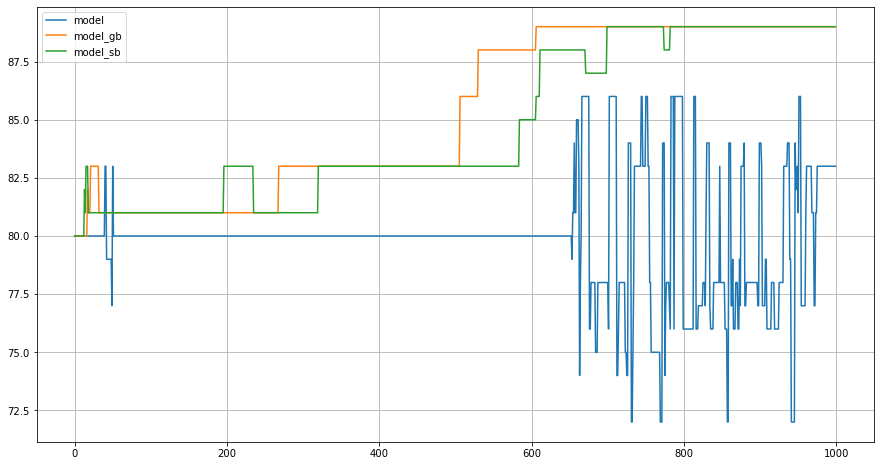

In [17]:
import pandas as pd

pd.DataFrame(history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca()#.set_ylim(0, 1) #Establecer eje vertical en [0-1]

#x = [i for i in range(5, 5001, 5)]
#xi = list(range(len(x)))
#plt.xticks(xi, x)
plt.show()